### libs

In [ ]:
!pip install emoji
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
import re
# import contractions
import string
from bs4 import BeautifulSoup
# import requests
# from collections import Counter
# from num2words import num2words
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
# import spacy
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
# import emoji
# from emoji import demojize
import nltk
import warnings
warnings.filterwarnings("ignore")

# from nltk.corpus import stopwords
from google.colab import drive
drive.mount('/content/drive')

pd.set_option('max_colwidth', 99999)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Mounted at /content/drive


## Data Prep

In [ ]:
# not_available.to_csv('/content/drive/MyDrive/ML Caption Craft/not_available_influencers.csv')
# available.to_csv('/content/drive/MyDrive/ML Caption Craft/available_influencers.csv')
# not_available.to_csv('/content/drive/MyDrive/ML Caption Craft/not_available_brands.csv')
# available.to_csv('/content/drive/MyDrive/ML Caption Craft/available_brands.csv')

In [ ]:
available_influencers = pd.read_csv('/content/drive/MyDrive/ML Caption Craft/available_influencers.csv')
available_influencers.head()

,Unnamed: 0,filename,username,followers,followees,post,url,t/f,category,bio,email,phone,profile pic
0,0,mathewfras,Mathew Fraser,1374835,359,713,https://www.roguefitness.com/catalogsearch/result?q=mat+fraser,True,Creators & Celebrities,"2018, 2017 & 2016 Crossfit Games Champion | UVM Mechanical Engineering |@Nike |@Redlinegr |@RogueFitness |@compexusa |@cellucor @scivation",management@loudlive.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/e97a6cf0d946c38cacca8ae201eed787/5C3C25B1/t51.2885-19/11419281_937337229666174_1850197481_a.jpg
1,1,johannycasillas,Blogger/Content Creator,2417,3567,1083,http://www.johannyskitchen.com/,True,Personal Goods & General Merchandise Stores,"Mom, army wife & foodie at heart. Recipes+Lifestyle+Photography 👩🏻‍🍳👩🏻‍💻📷 Latina in the Tri-State Area. Social Connect👉🏼@johannycasillas @zipkick",johannyc@johannyskitchen.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/5ba153b2de45f35e791ca238682cca08/5C4404C6/t51.2885-19/s320x320/29417350_390449881419650_2216673977705693184_n.jpg
2,2,joellefarrow,Joelle Farrow,19072,1010,247,http://bit.ly/joelleonein100,True,Creators & Celebrities,✈️🌎 📍Toronto @joandbritt,joelle.olivia@hotmail.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/32ca35c6c22da2d8b65fcc3dc1e82a2a/5C50C201/t51.2885-19/s320x320/30087804_2021820828072996_6504937358037614592_n.jpg
3,3,thebarbellbarbie,Sam Amorim,9676,514,652,http://mtsquad.click/Sam,True,Creators & Celebrities,@muscletech® : Code SAM10 23 |📍Boston | 🏡NJ Trying to live a normal life & also be fit 👻Snapchat: samamorim,samamorim@live.com,NaN,https://scontent-lax3-1.cdninstagram.com/vp/9433078c7b5979b61d3f723ad5e9d483/5C5D594F/t51.2885-19/s320x320/41715052_1604750422964127_6966902872164270080_n.jpg
4,4,charlih,Charli Hoffmann,43057,1103,1000,https://www.strava.com/athletes/3668811,False,NaN,🌏 Manly Beach / Sydney. 💁🏼 🏔 hoffmanncharli@gmail.com,NaN,NaN,https://scontent-lax3-1.cdninstagram.com/vp/600d0a7f9efd6c9480b6a51da6c7b08f/5C5F87D4/t51.2885-19/10979661_943410512350511_1163582328_a.jpg


In [ ]:
# available_profiles = pd.concat([available_brands, available_influencers], axis=0)
# print(available_profiles.shape)
available_influencers.drop(['Unnamed: 0', 'url'	,'t/f', 'bio'	,'email',	'phone'	,'profile pic'], axis=1,inplace=True)
available_influencers.head()

,filename,username,followers,followees,post,category
0,mathewfras,Mathew Fraser,1374835,359,713,Creators & Celebrities
1,johannycasillas,Blogger/Content Creator,2417,3567,1083,Personal Goods & General Merchandise Stores
2,joellefarrow,Joelle Farrow,19072,1010,247,Creators & Celebrities
3,thebarbellbarbie,Sam Amorim,9676,514,652,Creators & Celebrities
4,charlih,Charli Hoffmann,43057,1103,1000,NaN


In [ ]:
post_data_2 = pd.read_csv('/content/drive/MyDrive/ML Caption Craft/fully_processed_dataset_half_2.csv', lineterminator='\n')
post_data_2.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'],axis=1, inplace = True)
post_data_2.head()

,id,user,is_sponsored,json_p,img_p,image_count,caption,like_count,comment_count,is_video
0,797299,lydialouiseblog,0,1861385848916166669.json,1861385848916166669.jpg,1,"*Details* I am all about them this 🍁 fall! And this sweater has so much with the circle hem, strappy back, and three quarter dolman sleeve! Comes in a gorgeous olive green too! So comfy! I will be wearing this clear through the season! (I am in a S for reference and is loose over my baby bump)⠀\n.⠀\n.⠀\n🛒📱SHOP this sweater and more via link in bio or @liketoknow.it http://liketk.it/2xdTT .⠀\n.⠀\n.⠀\n#shopthelook #prettylittleiiinspo #fashiondetails ⠀\n#styleme #styleinfluencer #rewardstylebloggers #shoptillyoudrop #liketkit #LTKbump #LTKstyletip #LTKunder50",228,26,False
1,797300,lydialouiseblog,0,1861778765786697938.json,1861778765786697938.jpg,1,Can’t believe it is already Wednesday! Getting the 🍁 fall decor out today and so excited! Follow my stories today to see my enormous 🎃🍂collection! 🙈 || Possibly need this sweater in olive too! It’s too perfect for early fall! ⠀\n.⠀\n.⠀\n🛒📱SHOP this look and more via link in bio or⠀ @liketoknow.it http://liketk.it/2xeaG .⠀\n.⠀\n.⠀ #liketkit #LTKbump #LTKmens #LTKunder50 #LTKsalealert #bumpstyle #momootd #itshappyhere #falloutfits #rewardstylebloggers #styleinfluencer #ootdblogger,461,42,False
2,797301,lydialouiseblog,0,1862094648358895451.json,1862094648358895451.jpg,1,Wishing I was on my way to #NYFW! Instead I am sharing how to celebrate all week from home! Yup I’m doing Fashion Week from the 🛋 couch 💁🏼‍♀️ Follow along on the blog and stories to see how 😘 || P.S. This top is way to comfy to be this cute! Comes in several colors! .\n.\n🛒 SHOP this look and 📖 read the blog via link in bio or @liketoknow.it http://liketk.it/2xeCh .\n.\n #liketkit #LTKbump #LTKstyletip #LTKsalealert .,423,34,False
3,797302,lydialouiseblog,0,1862500978211081353.json,1862500978211081353.jpg,1,Happy Thursday Friends! *#ontheblogtoday* “How to Celebrate #nyfw2018 at home!” Because I am just over here living vicariously through some of my friends who are there! || A look at this entire outfit I will be living in this 🍁 fall! And my fav OTK 👢 boots come in several colors and actually easy to get on and stay up very well! ⠀\n.⠀\n.⠀\n🛒 SHOP this look and 📖 read the post via link in bio or⠀ @liketoknow.it http://liketk.it/2xeXb .⠀\n.⠀\n.⠀ #liketkit #LTKbump #LTKshoecrush #LTKstyletip #LTKunder50 #LTKunder100 #LTKsalealert,392,27,False
4,797303,lydialouiseblog,0,1862790167351628785.json,1862790167351628785.jpg,1,Trying my best to stay cute as this bump continues to grow and easy pieces have been 🔑 key! This simple striped long sleeve tee is only $19 and comes in 4 color combinations! I love that it is extra long so it fits well over a🤰🏼 baby bump and easy to front knot or tuck!⠀\n.⠀\n.⠀\nP.S. My bracelet and necklace are recent favs! (@thestyledcollection & @express)⠀\n.⠀\n.⠀\nSHOP this look and more via link in bio or⠀ @liketoknow.it http://liketk.it/2xfo8 .⠀\n.⠀\n.⠀\n#lovingthislife #bumpstyle #babybump #momootd #basicstyle #closetstaple #simplefashion #stripedshirt #nordygirl #liketkit #LTKbump #LTKsalealert #LTKunder50,401,26,False


In [ ]:
post_data_1 = pd.read_csv('/content/drive/MyDrive/ML Caption Craft/fully_processed_dataset_half_1.csv', lineterminator='\n')
post_data_1.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1, inplace = True)
post_data_1.head()

,id,user,is_sponsored,json_p,img_p,image_count,caption,like_count,comment_count,is_video
0,1,alisasia,0,1311846669234786866.json,1311846669234786866.jpg,1,In a Barbie world 💖\n@evahairofficial wig,1526,14,False
1,2,alisasia,0,1315560311952470229.json,1315560311952470229.jpg,1,Pink bathing suit from @rosegal_official 💗 it can also be worn as a top!,1243,6,False
2,3,alisasia,0,1318531733175899446.json,1318531733175899446.jpg,1,Look at my summer #beauty nails made in collaboration with @walgreens 💅🏻,1011,3,False
3,4,alisasia,0,1343280729400051114.json,1343280729400051114.jpg,1,Look at this stuff @beautybyearth sent me! ☺️☺️☺️,886,4,False
4,5,alisasia,0,1343284435982033594.json,1343284435982033594.jpg,1,I always post all my going out outfits on Snap follow me on there: AlisaSia ⌛️\nLace top from @sheinofficial,1481,14,False


In [ ]:
post_data = pd.concat([post_data_1, post_data_2], axis=0)
print(post_data.shape)
post_data.head()

(1191865, 10)


,id,user,is_sponsored,json_p,img_p,image_count,caption,like_count,comment_count,is_video
0,1,alisasia,0,1311846669234786866.json,1311846669234786866.jpg,1,In a Barbie world 💖\n@evahairofficial wig,1526,14,False
1,2,alisasia,0,1315560311952470229.json,1315560311952470229.jpg,1,Pink bathing suit from @rosegal_official 💗 it can also be worn as a top!,1243,6,False
2,3,alisasia,0,1318531733175899446.json,1318531733175899446.jpg,1,Look at my summer #beauty nails made in collaboration with @walgreens 💅🏻,1011,3,False
3,4,alisasia,0,1343280729400051114.json,1343280729400051114.jpg,1,Look at this stuff @beautybyearth sent me! ☺️☺️☺️,886,4,False
4,5,alisasia,0,1343284435982033594.json,1343284435982033594.jpg,1,I always post all my going out outfits on Snap follow me on there: AlisaSia ⌛️\nLace top from @sheinofficial,1481,14,False


In [ ]:
available_influencers.columns

Index(['filename', 'username', 'followers', 'followees', 'post', 'category'], dtype='object')

In [ ]:
post_user_data = post_data.join(available_influencers.set_index('filename'), on='user', validate='m:1')
print(post_user_data.shape)
post_user_data.head()

(1191865, 15)


,id,user,is_sponsored,json_p,img_p,image_count,caption,like_count,comment_count,is_video,username,followers,followees,post,category
0,1,alisasia,0,1311846669234786866.json,1311846669234786866.jpg,1,In a Barbie world 💖\n@evahairofficial wig,1526,14,False,Alisa Sia,41099,320,691,Creators & Celebrities
1,2,alisasia,0,1315560311952470229.json,1315560311952470229.jpg,1,Pink bathing suit from @rosegal_official 💗 it can also be worn as a top!,1243,6,False,Alisa Sia,41099,320,691,Creators & Celebrities
2,3,alisasia,0,1318531733175899446.json,1318531733175899446.jpg,1,Look at my summer #beauty nails made in collaboration with @walgreens 💅🏻,1011,3,False,Alisa Sia,41099,320,691,Creators & Celebrities
3,4,alisasia,0,1343280729400051114.json,1343280729400051114.jpg,1,Look at this stuff @beautybyearth sent me! ☺️☺️☺️,886,4,False,Alisa Sia,41099,320,691,Creators & Celebrities
4,5,alisasia,0,1343284435982033594.json,1343284435982033594.jpg,1,I always post all my going out outfits on Snap follow me on there: AlisaSia ⌛️\nLace top from @sheinofficial,1481,14,False,Alisa Sia,41099,320,691,Creators & Celebrities


## EDA

In [ ]:
#  post_user_data.to_csv('/content/drive/MyDrive/ML Caption Craft/post_user_data.csv')
post_user_data = pd.read_csv('/content/drive/MyDrive/ML Caption Craft/post_user_data.csv')

In [ ]:
post_user_data.shape

(1510097, 16)

In [ ]:
post_user_data.head()

,Unnamed: 0,id,user,is_sponsored,json_p,img_p,image_count,caption,like_count,comment_count,is_video,username,followers,followees,post,category
0,0,1.0,alisasia,0,1311846669234786866.json,1311846669234786866.jpg,1.0,In a Barbie world 💖\n@evahairofficial wig,1526.0,14.0,False,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities
1,1,2.0,alisasia,0,1315560311952470229.json,1315560311952470229.jpg,1.0,Pink bathing suit from @rosegal_official 💗 it can also be worn as a top!,1243.0,6.0,False,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities
2,2,3.0,alisasia,0,1318531733175899446.json,1318531733175899446.jpg,1.0,Look at my summer #beauty nails made in collaboration with @walgreens 💅🏻,1011.0,3.0,False,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities
3,3,4.0,alisasia,0,1343280729400051114.json,1343280729400051114.jpg,1.0,Look at this stuff @beautybyearth sent me! ☺️☺️☺️,886.0,4.0,False,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities
4,4,5.0,alisasia,0,1343284435982033594.json,1343284435982033594.jpg,1.0,I always post all my going out outfits on Snap follow me on there: AlisaSia ⌛️\nLace top from @sheinofficial,1481.0,14.0,False,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities


In [ ]:
post_user_data.groupby(['category'])['id'].count()

category
Auto Dealers                                      643
Business & Utility Services                      5774
Content & Apps                                   2592
Creators & Celebrities                         851476
Entities                                           54
Food & Personal Goods                            4121
General Interest                                28231
Geography                                          15
Government Agencies                               119
Grocery & Convenience Stores                     2475
Home & Auto                                         2
Home Goods Stores                                8032
Home Services                                    8068
Lifestyle Services                              13222
Local Events                                     2895
Non-Profits & Religious Organizations           12122
Personal Goods & General Merchandise Stores     49294
Professional Services                            3299
Publishers         

In [ ]:
post_user_data.groupby(['image_count'])['id'].count()

image_count
1.0       1345135
131.0           1
271.0           1
505.0           1
640.0           1
681.0           1
707.0           1
828.0           1
861.0           1
901.0           1
906.0           1
1054.0          1
1163.0          2
1484.0          1
1938.0          1
4231.0          1
5071.0          1
6375.0          2
Name: id, dtype: int64

In [ ]:
post_user_data = post_user_data[post_user_data['image_count']==1.0].reset_index()
post_user_data.shape

(1345135, 17)

In [ ]:
post_user_data.groupby(['is_video'])['id'].count()

is_video
False    1191846
Name: id, dtype: int64

In [ ]:
post_user_data['is_video'].isna().sum()

153289

In [ ]:
post_user_data.drop(columns=['Unnamed: 0',	'id' ,'image_count','is_sponsored' ,'is_video' ,'index'	],inplace=True)
post_user_data.shape

(1345135, 11)

In [ ]:
post_user_data.head()

,user,json_p,img_p,caption,like_count,comment_count,username,followers,followees,post,category
0,alisasia,1311846669234786866.json,1311846669234786866.jpg,In a Barbie world 💖\n@evahairofficial wig,1526.0,14.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities
1,alisasia,1315560311952470229.json,1315560311952470229.jpg,Pink bathing suit from @rosegal_official 💗 it can also be worn as a top!,1243.0,6.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities
2,alisasia,1318531733175899446.json,1318531733175899446.jpg,Look at my summer #beauty nails made in collaboration with @walgreens 💅🏻,1011.0,3.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities
3,alisasia,1343280729400051114.json,1343280729400051114.jpg,Look at this stuff @beautybyearth sent me! ☺️☺️☺️,886.0,4.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities
4,alisasia,1343284435982033594.json,1343284435982033594.jpg,I always post all my going out outfits on Snap follow me on there: AlisaSia ⌛️\nLace top from @sheinofficial,1481.0,14.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities


In [ ]:
post_user_data['like+comment/foll'] = (post_user_data['like_count'].astype(float) + post_user_data['comment_count'].astype(float) - post_user_data['followers'].astype(float)*0.1)

In [ ]:
post_user_data.head()

,user,json_p,img_p,caption,like_count,comment_count,username,followers,followees,post,category,like+comment/foll
0,alisasia,1311846669234786866.json,1311846669234786866.jpg,In a Barbie world 💖\n@evahairofficial wig,1526.0,14.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-2569.9
1,alisasia,1315560311952470229.json,1315560311952470229.jpg,Pink bathing suit from @rosegal_official 💗 it can also be worn as a top!,1243.0,6.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-2860.9
2,alisasia,1318531733175899446.json,1318531733175899446.jpg,Look at my summer #beauty nails made in collaboration with @walgreens 💅🏻,1011.0,3.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-3095.9
3,alisasia,1343280729400051114.json,1343280729400051114.jpg,Look at this stuff @beautybyearth sent me! ☺️☺️☺️,886.0,4.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-3219.9
4,alisasia,1343284435982033594.json,1343284435982033594.jpg,I always post all my going out outfits on Snap follow me on there: AlisaSia ⌛️\nLace top from @sheinofficial,1481.0,14.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-2614.9


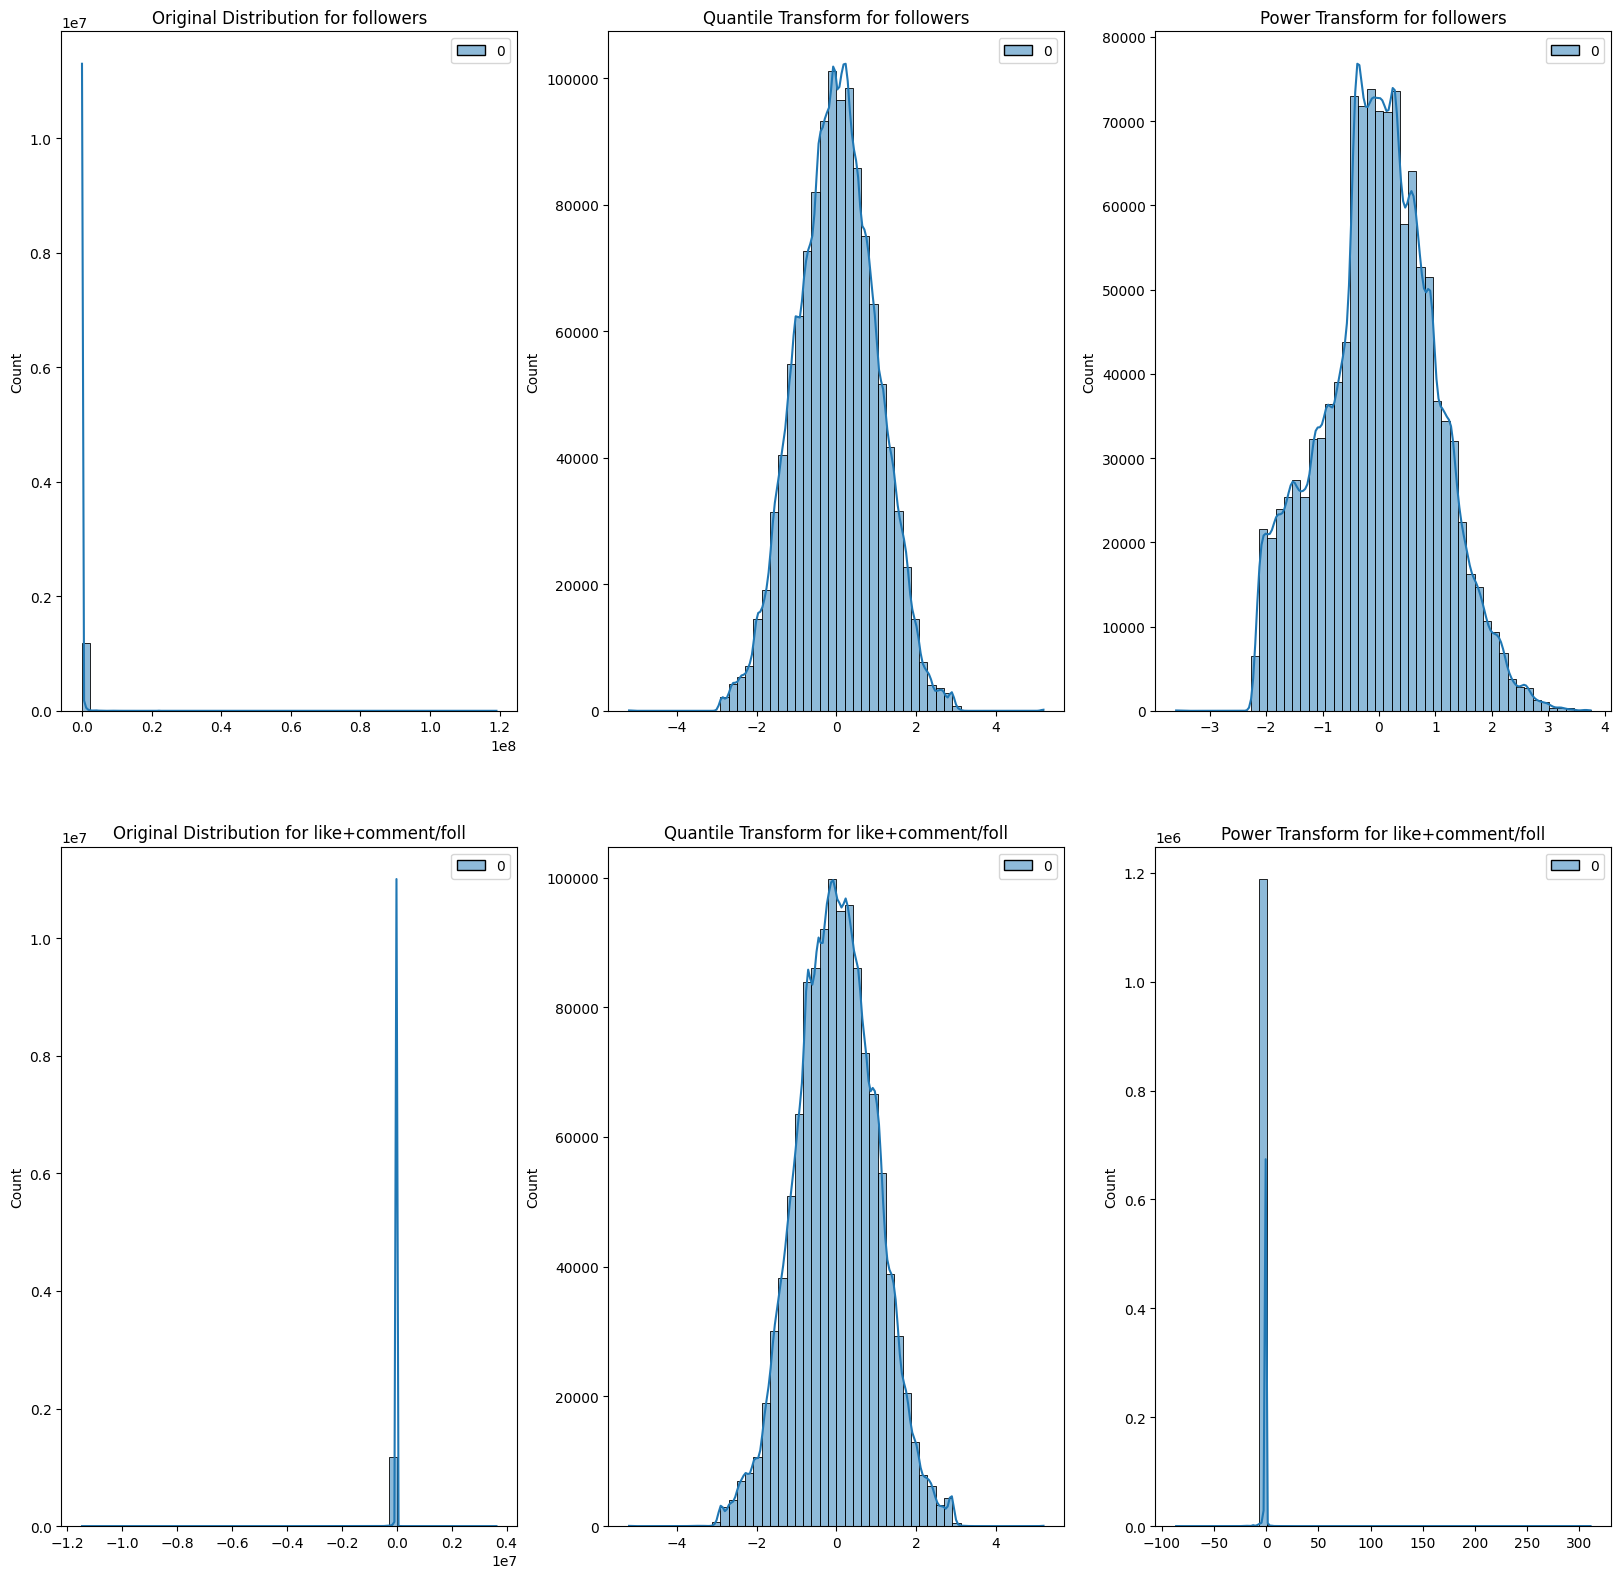

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
cols1 = ['followers','like+comment/foll']
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(post_user_data[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
test_transformers(cols1)

<Axes: xlabel='like+comment/foll', ylabel='Density'>

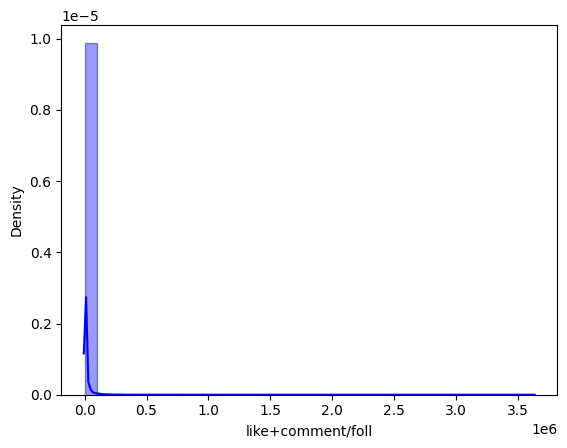

In [ ]:
# ax =
# sns.scatterplot(post_user_data['followers'])
# ax.set_yscale('log')
# plt.show()
sns.distplot(post_user_data[post_user_data['like+comment/foll'] > 2]['like+comment/foll'], hist=True, kde=True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

<Axes: xlabel='followers', ylabel='like+comment/foll'>

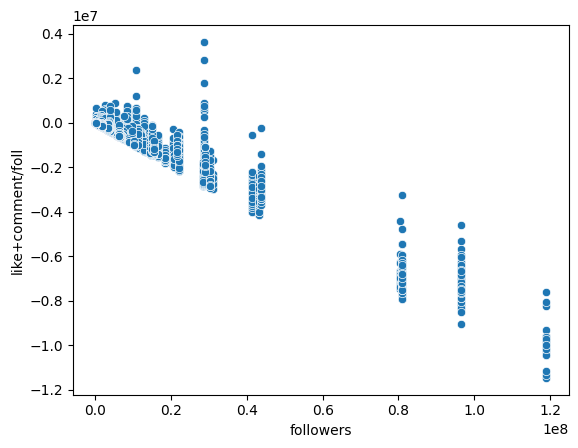

In [ ]:
sns.scatterplot(x=post_user_data['followers'], y=post_user_data['like+comment/foll'])
# sns.scatterplot(x=post_user_data[post_user_data['followers']>50000]['followers'], y=post_user_data[post_user_data['like+comment/foll']>0.7]['like+comment/foll'] )

<Axes: xlabel='followers', ylabel='like+comment/foll'>

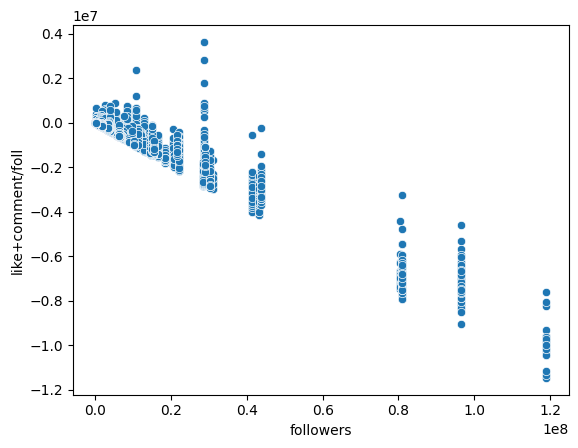

In [ ]:
sns.scatterplot(x=  post_user_data['followers'], y=post_user_data['like+comment/foll'] )

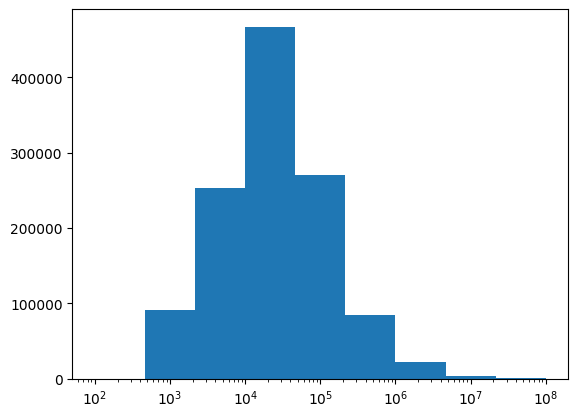

In [ ]:
plt.hist(post_user_data['followers'], bins=np.logspace(start=np.log10(100), stop=np.log10(100000000), num=10))
plt.gca().set_xscale("log")
plt.show()

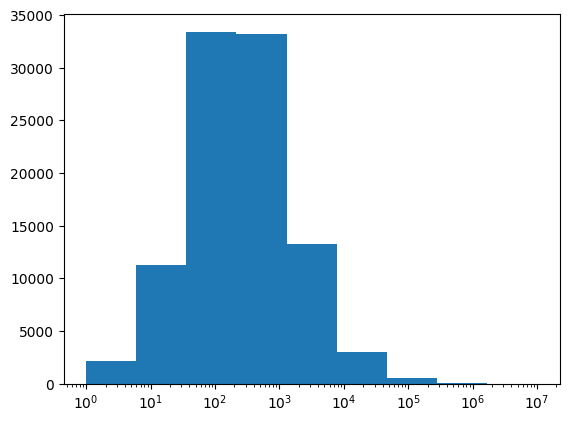

In [ ]:
plt.hist(post_user_data['like+comment/foll'], bins=np.logspace(start=np.log10(1), stop=np.log10(10000000), num=10))
plt.gca().set_xscale("log")
plt.show()

In [ ]:
post_user_data['log_foll'] = np.log10(post_user_data['followers'])
post_user_data['log_like+comment/foll'] = np.log10(post_user_data['like+comment/foll'])

<Axes: xlabel='log_foll', ylabel='Count'>

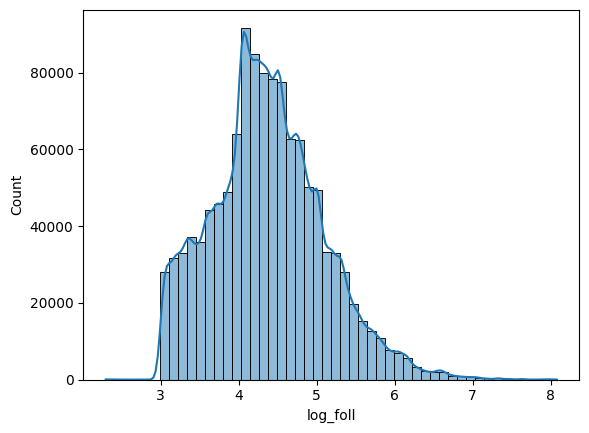

In [ ]:
sns.histplot(post_user_data['log_foll'], bins = 50, kde = True)

<Axes: xlabel='log_like+comment/foll', ylabel='Count'>

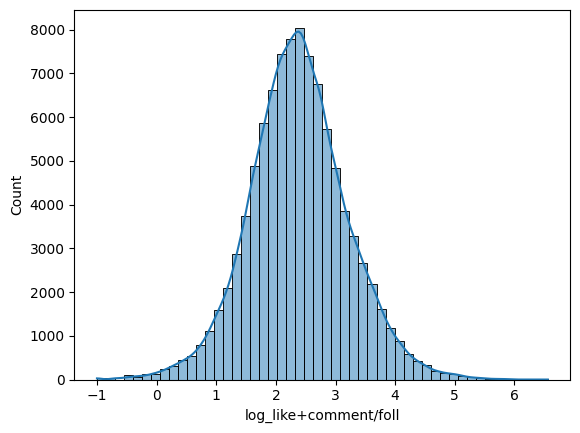

In [ ]:
sns.histplot(post_user_data['log_like+comment/foll'], bins = 50, kde = True)

<Axes: xlabel='log_foll', ylabel='log_like+comment/foll'>

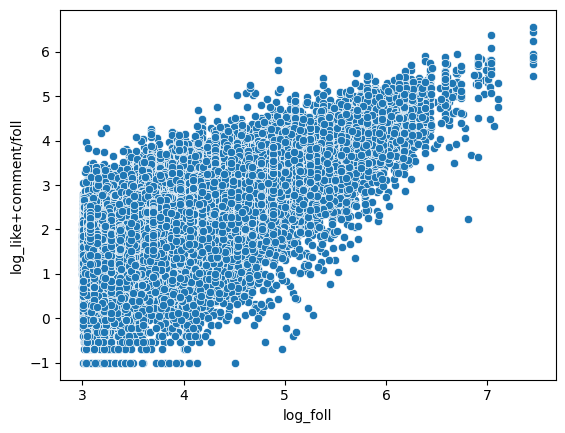

In [ ]:
sns.scatterplot(x = post_user_data['log_foll'], y = post_user_data['log_like+comment/foll'])

In [ ]:
post_user_data['score'] = post_user_data['log_like+comment/foll']/post_user_data['log_foll']

<Axes: xlabel='score', ylabel='Count'>

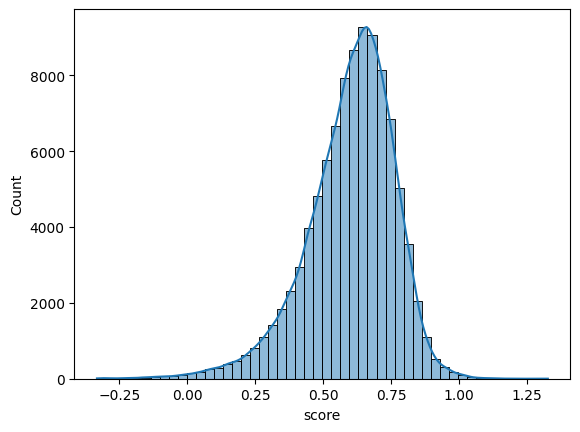

In [ ]:
sns.histplot(post_user_data['score'], bins = 50, kde = True)

<Axes: xlabel='score'>

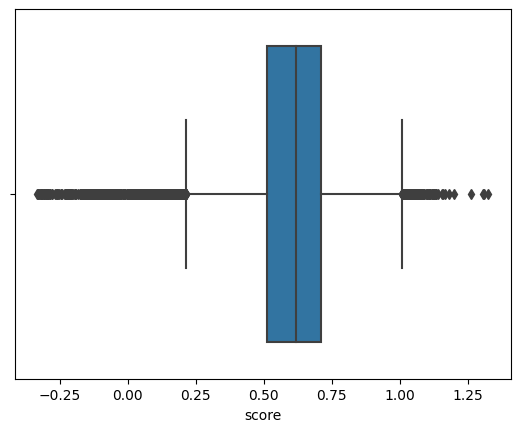

In [ ]:
sns.boxplot(x=post_user_data['score'])

In [ ]:
# q3 = post_user_data.score.quantile([0.75])
# likable_data = post_user_data[post_user_data['score']>=q3[0.75]]
# likable_data.reset_index(inplace=True, drop =True)

In [ ]:
likable_data.to_csv('/content/drive/MyDrive/ML Caption Craft/likable_data.csv')

In [ ]:
likable_data = post_user_data.copy()
likable_data.head()

,user,json_p,img_p,caption,like_count,comment_count,username,followers,followees,post,category,like+comment/foll,log_foll,log_like+comment/foll,score
0,alisasia,1311846669234786866.json,1311846669234786866.jpg,In a Barbie world 💖\n@evahairofficial wig,1526.0,14.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-2569.9,4.613831,NaN,NaN
1,alisasia,1315560311952470229.json,1315560311952470229.jpg,Pink bathing suit from @rosegal_official 💗 it can also be worn as a top!,1243.0,6.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-2860.9,4.613831,NaN,NaN
2,alisasia,1318531733175899446.json,1318531733175899446.jpg,Look at my summer #beauty nails made in collaboration with @walgreens 💅🏻,1011.0,3.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-3095.9,4.613831,NaN,NaN
3,alisasia,1343280729400051114.json,1343280729400051114.jpg,Look at this stuff @beautybyearth sent me! ☺️☺️☺️,886.0,4.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-3219.9,4.613831,NaN,NaN
4,alisasia,1343284435982033594.json,1343284435982033594.jpg,I always post all my going out outfits on Snap follow me on there: AlisaSia ⌛️\nLace top from @sheinofficial,1481.0,14.0,Alisa Sia,41099.0,320.0,691.0,Creators & Celebrities,-2614.9,4.613831,NaN,NaN


## Pre - Processing

###### emoticons

In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

### Processing

In [ ]:
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi01.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi02.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi03.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi04.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi05.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi06.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi07.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi08.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi09.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi10.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi11.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi12.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi13.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi14.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi15.zip'
# !unzip '/content/drive/MyDrive/ML Caption Craft/Influencer brand dataset/img_fi16.zip'

In [ ]:
likable_data = pd.read_csv('/content/drive/MyDrive/ML Caption Craft/likable_data.csv')

In [ ]:
# import shutil

In [ ]:
# path_new = '/content/drive/MyDrive/ML Caption Craft/ALL Images/'
# path_old = '/content/img_resized/'
# not_found=[]
# for path in tqdm(post_user_data['img_p']):
#   # try:
#     src = path_old + path
#     dest = path_new + path
#     shutil.copy2(src, dest)
#   # except:
#   #   not_found.append(path)

In [ ]:
# len(not_found)

In [ ]:
# likable_data = likable_data[~likable_data['img_p'].isin(not_found)]

In [ ]:
# likable_data.to_csv('/content/drive/MyDrive/ML Caption Craft/likable_data.csv')

In [ ]:
likable_data.shape

(24325, 17)

In [ ]:
likable_data.head()

,Unnamed: 0.1,Unnamed: 0,user,json_p,img_p,caption,like_count,comment_count,username,followers,followees,post,category,like+comment/foll,log_foll,log_like+comment/foll,score
0,0,0,ceddyced1125,1861903620333890097.json,1861903620333890097.jpg,"“You can be whatever size you are, and you can be beautiful both inside and out” - Serena\n.\nWhat’s your S? “Mines is First Day Of SCHOOL!!” 💪🏾📚🎒\n@serenawilliams @serena #BeSeenBeHeard #backtoschool I #love #serenawilliams",1461.0,18.0,Ceddy Ced,3043.0,1479.0,1769.0,Creators & Celebrities,1174.7,3.483302,3.069927,0.881327
1,1,1,alliesiv,1453987990896372228.json,1453987990896372228.jpg,@sportsillustrated night deux ✨,663.0,23.0,Allie Sivils,3015.0,2306.0,103.0,Creators & Celebrities,384.5,3.479287,2.584896,0.742938
2,2,2,alliesiv,1532896425460868252.json,1532896425460868252.jpg,BASIC • @adidas,718.0,39.0,Allie Sivils,3015.0,2306.0,103.0,Creators & Celebrities,455.5,3.479287,2.658488,0.764090
3,3,3,angieknowsthetruth,2020784155847137387.json,2020784155847137387.jpg,I may feel like crapola today but at least I can still show a little leg and feel good about myself 💁🏼 💎 Find this chambray dress at @target I am wearing a size XXL for some extra wiggle room. Fringe booties are target last season but I’ve linked similar in my amazon shop! Link in bio!,927.0,28.0,Angie Haering 🍷,4715.0,1501.0,898.0,NaN,483.5,3.673482,2.684396,0.730750
4,4,4,angieknowsthetruth,2022223424923098097.json,2022223424923098097.jpg,🍃You know what I am? 🍃I am smart 🍃I am talented 🍃I take advantage of the opportunities that come my way ☝️AND I work really really hard. 👊\nDon’t call me lucky. Call me a badass 💋\n.\n.\n💎Nude cardi on sale @justfabonline and dress is @nphilanthropy available in my amazon shop link in bio.,1057.0,24.0,Angie Haering 🍷,4715.0,1501.0,898.0,NaN,609.5,3.673482,2.784974,0.758129


In [ ]:
col = set(likable_data.columns)
req = set(['img_p',	'caption'])
col = list(col-req)
likable_data.drop(columns=col,inplace= True)
likable_data.head()

,img_p,caption
0,1861903620333890097.jpg,"“You can be whatever size you are, and you can be beautiful both inside and out” - Serena\n.\nWhat’s your S? “Mines is First Day Of SCHOOL!!” 💪🏾📚🎒\n@serenawilliams @serena #BeSeenBeHeard #backtoschool I #love #serenawilliams"
1,1453987990896372228.jpg,@sportsillustrated night deux ✨
2,1532896425460868252.jpg,BASIC • @adidas
3,2020784155847137387.jpg,I may feel like crapola today but at least I can still show a little leg and feel good about myself 💁🏼 💎 Find this chambray dress at @target I am wearing a size XXL for some extra wiggle room. Fringe booties are target last season but I’ve linked similar in my amazon shop! Link in bio!
4,2022223424923098097.jpg,🍃You know what I am? 🍃I am smart 🍃I am talented 🍃I take advantage of the opportunities that come my way ☝️AND I work really really hard. 👊\nDon’t call me lucky. Call me a badass 💋\n.\n.\n💎Nude cardi on sale @justfabonline and dress is @nphilanthropy available in my amazon shop link in bio.


In [ ]:
likable_data.head(20)

,img_p,caption
0,1861903620333890097.jpg,"“You can be whatever size you are, and you can be beautiful both inside and out” - Serena\n.\nWhat’s your S? “Mines is First Day Of SCHOOL!!” 💪🏾📚🎒\n@serenawilliams @serena #BeSeenBeHeard #backtoschool I #love #serenawilliams"
1,1453987990896372228.jpg,@sportsillustrated night deux ✨
2,1532896425460868252.jpg,BASIC • @adidas
3,2020784155847137387.jpg,I may feel like crapola today but at least I can still show a little leg and feel good about myself 💁🏼 💎 Find this chambray dress at @target I am wearing a size XXL for some extra wiggle room. Fringe booties are target last season but I’ve linked similar in my amazon shop! Link in bio!
4,2022223424923098097.jpg,🍃You know what I am? 🍃I am smart 🍃I am talented 🍃I take advantage of the opportunities that come my way ☝️AND I work really really hard. 👊\nDon’t call me lucky. Call me a badass 💋\n.\n.\n💎Nude cardi on sale @justfabonline and dress is @nphilanthropy available in my amazon shop link in bio.
5,2022602597378110298.jpg,I remember moments after giving birth to this kid I thought to myself — I have no idea what I’m doing!?!? .. but I figured since I had kept my cats alive for 15 years that I’d be ok 😆Turns out taking care of newborns and babies in general isn’t too difficult if your used to 0 sleep 🙋🙋🙋 It’s when they start testing you with their witty comebacks that you start wishing you would have read one of those parenting books. The chaos of toddlerhood is more real now than ever. But look at that happy little guy— there’s still a little baby face left there but not for much longer. I’m a learn as I go type Mama and we are figuring out this toddler stuff together. Making memories and living our best life. That’s what it’s all about. 💁🏼\n🎯🎯Now on our way to @target !!! 🎯🎯🎯
6,2024142324329636087.jpg,"🌷🐚🌱Mary, Mary, quite contrary\nHow does your garden grow?\nWith silver bells and cockleshells\nAnd pretty maids all in a row. 🌱🐚🌷\n.\n.\n💎 Dress by @targetstyle #anewday and it was only $15 — I purchased 3 days ago so it’s still on racks! Perfect for Easter! .\n.\n#springtime #springstyle #springfashion2019 #springfashion #nurseryrhymes #marymaryquitecontrary #angieknowsthetruth #gardenfashion #springvibes #sunnydays #plussize #plussizefashion #morningglow #blooming #springmorning #targetstyle #targetfashion #targetdoesitagain #targetforthewin #cincinnatifashion"
7,2025765529305765747.jpg,💦Skincare Post 💦- Get prepared for a series of skincare posts!!! I’ve honestly never used an official “peel” before. So I was excited to try one when @dermae sent me their newest product Vitamin C Radiance Peel! 🍊First of all I love all products containing vitamin C. My skin responds well to this super food ingredient. Leaving my skin brighter and more radiant! Plus it’s great for promoting collagen production and helps plump your skin — so less fine lines and wrinkles! 💁🏼\n☝️This peel has been pure heaven for my skin. Leaving a blank canvas (with no flaky skin or redness after) to apply my favorite @dermae moisturizer or makeup. I use it once a week while I’m in the shower but prefer to use in the morning since that vibrant orange smell helps wake me up! .\nYou can find this brand at @target and @ultabeauty ! .\n.\n#skincare #skincarepost #antiaging #vitaminc #vitamincpeel #dermae #ulta #ultabeauty #skincareroutine #skincareproducts #skincaretips #cincinnatiblogger #cincybloggers #mamaknowsbest #angieknowsthetruth #angieknowsthetruthapproved #takecareofyourskin #gettingold #finelinesandwrinkles
8,1655975976116722026.jpg,"✨GIVEAWAY CLOSED✨ Congratulations @ryannlillianb! You're the winner!👏🏼\nI’ve partnered with @lilyjadeco to give one of you a $300 lily jade credit for any purchase on their website! I know many of you are already in love with their gorgeous bags so this is the perfect chance to snag one!🙌🏼\nSimple steps to enter:\n1. Follow me @angelisebrio and @lilyjadeco\n2. Like this photo and tag a friend in the comments below. (each tag is an entry so

In [ ]:
empty_rows = list(np.where(pd.isnull(likable_data['caption']))[0])
likable_data.drop(empty_rows , inplace=True)
likable_data.shape

(24195, 2)

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

def remove_punctuation_except_emoticons(text):
    # pattern = '|'.join(map(re.escape, list(EMOTICONS.keys())))
    # Replace punctuations with spaces, except for emoticons
    text = re.sub(r'[^\w\s]|_+(?=[^\s])', ' ', text)
    # Re-insert emoticons into the text
    # text = re.sub(pattern, lambda x: x.group().replace(' ', ''), text)
    return text

def give_emoji_free_text(text):
    return emoji.replace_emoji(text, replace='')

def remove_links(s):
  url_pattern = r'https?://\S+|www\.\S+'
  if re.search(url_pattern, s):
    # print(caption)
    text = re.sub(url_pattern, "", s)
  else:
    # print("no link")
    text = s
  return text

def preprocess_caption(text):
    # Preserve original case
    original_text = text

    # Lowercase the text for tokenization (BERT works better with lowercase)
    text = text.lower()

    text = text.replace( '•', ' ' )

    text = contractions.fix(text)

    text = remove_links(text)

    text = convert_emoticons(text)

    # # Remove emojis
    text = give_emoji_free_text(text)

    # Remove @
    text = re.sub(r'@\w+', '', text)

    # # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    text = text.replace('\n', ' ')

    text = remove_punctuation_except_emoticons(text)

    # text = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

    # Handle repetitions (e.g., "loooove" to "love")
    # This is a simple example; you might need a more sophisticated approach
    # text = re.sub(r'(.)\1+', r'\1', text)


    # Return preprocessed text and original text for reference
    return text.strip(), original_text.strip()

In [ ]:
preprocessed_captions = []
original_captions = []
for caption in tqdm(likable_data['caption']):
    processed, original = preprocess_caption(caption)
    preprocessed_captions.append(processed)
    original_captions.append(original)

  0%|          | 0/24090 [00:00<?, ?it/s]

In [ ]:
original_captions[:10]

['“You can be whatever size you are, and you can be beautiful both inside and out” - Serena\n.\nWhat’s your S? “Mines is First Day Of SCHOOL!!” 💪🏾📚🎒\n@serenawilliams @serena #BeSeenBeHeard #backtoschool I #love #serenawilliams',
 '@sportsillustrated night deux ✨',
 'BASIC • @adidas',
 'I may feel like crapola today but at least I can still show a little leg and feel good about myself 💁🏼 💎 Find this chambray dress at @target I am wearing a size XXL for some extra wiggle room. Fringe booties are target last season but I’ve linked similar in my amazon shop! Link in bio!',
 '🍃You know what I am? 🍃I am smart 🍃I am talented 🍃I take advantage of the opportunities that come my way ☝️AND I work really really hard. 👊\nDon’t call me lucky. Call me a badass 💋\n.\n.\n💎Nude cardi on sale @justfabonline and dress is @nphilanthropy available in my amazon shop link in bio.',
 'I remember moments after giving birth to this kid I thought to myself — I have no idea what I’m doing!?!? .. but I figured sinc

In [ ]:
preprocessed_captions[:10]

['you can be whatever size you are  and you can be beautiful both inside and out    serena   what is your s   mines is first day of school         i',
 'night deux',
 'basic',
 'i may feel like crapola today but at least i can still show a little leg and feel good about myself   find this chambray dress at  i am wearing a size xxl for some extra wiggle room  fringe booties are target last season but i have linked similar in my amazon shop  link in bio',
 'you know what i am  i am smart i am talented i take advantage of the opportunities that come my way and i work really really hard   do not call me lucky  call me a badass      nude cardi on sale  and dress is  available in my amazon shop link in bio',
 'i remember moments after giving birth to this kid i thought to myself   i have no idea what i am doing        but i figured since i had kept my cats alive for 15 years that i would be ok turns out taking care of newborns and babies in general is not too difficult if your used to 0 slee

In [ ]:
likable_data['caption'] = original_captions
likable_data['preprocessed_captions'] = preprocessed_captions

In [ ]:
likable_data.head(10)

,img_p,caption,preprocessed_captions
0,1861903620333890097.jpg,"“You can be whatever size you are, and you can be beautiful both inside and out” - Serena\n.\nWhat’s your S? “Mines is First Day Of SCHOOL!!” 💪🏾📚🎒\n@serenawilliams @serena #BeSeenBeHeard #backtoschool I #love #serenawilliams",you can be whatever size you are and you can be beautiful both inside and out serena what is your s mines is first day of school i
1,1453987990896372228.jpg,@sportsillustrated night deux ✨,night deux
2,1532896425460868252.jpg,BASIC • @adidas,basic
3,2020784155847137387.jpg,I may feel like crapola today but at least I can still show a little leg and feel good about myself 💁🏼 💎 Find this chambray dress at @target I am wearing a size XXL for some extra wiggle room. Fringe booties are target last season but I’ve linked similar in my amazon shop! Link in bio!,i may feel like crapola today but at least i can still show a little leg and feel good about myself find this chambray dress at i am wearing a size xxl for some extra wiggle room fringe booties are target last season but i have linked similar in my amazon shop link in bio
4,2022223424923098097.jpg,🍃You know what I am? 🍃I am smart 🍃I am talented 🍃I take advantage of the opportunities that come my way ☝️AND I work really really hard. 👊\nDon’t call me lucky. Call me a badass 💋\n.\n.\n💎Nude cardi on sale @justfabonline and dress is @nphilanthropy available in my amazon shop link in bio.,you know what i am i am smart i am talented i take advantage of the opportunities that come my way and i work really really hard do not call me lucky call me a badass nude cardi on sale and dress is available in my amazon shop link in bio
5,2022602597378110298.jpg,I remember moments after giving birth to this kid I thought to myself — I have no idea what I’m doing!?!? .. but I figured since I had kept my cats alive for 15 years that I’d be ok 😆Turns out taking care of newborns and babies in general isn’t too difficult if your used to 0 sleep 🙋🙋🙋 It’s when they start testing you with their witty comebacks that you start wishing you would have read one of those parenting books. The chaos of toddlerhood is more real now than ever. But look at that happy little guy— there’s still a little baby face left there but not for much longer. I’m a learn as I go type Mama and we are figuring out this toddler stuff together. Making memories and living our best life. That’s what it’s all about. 💁🏼\n🎯🎯Now on our way to @target !!! 🎯🎯🎯,i remember moments after giving birth to this kid i thought to myself i have no idea what i am doing but i figured since i had kept my cats alive for 15 years that i would be ok turns out taking care of newborns and babies in general is not too difficult if your used to 0 sleep it is when they start testing you with their witty comebacks that you start wishing you would have read one of those parenting books the chaos of toddlerhood is more real now than ever but look at that happy little guy there is still a little baby face left there but not for much longer i am a learn as i go type mama and we are figuring out this toddler stuff together making memories and living our best life that is what it is all about now on our way to
6,2024142324329636087.jpg,"🌷🐚🌱Mary, Mary, quite contrary\nHow does your garden grow?\nWith silver bells and cockleshells\nAnd pretty maids all in a row. 🌱🐚🌷\n.\n.\n💎 Dress by @targetstyle #anewday and it was only $15 — I purchased 3 days ago so it’s still on racks! Perfect for Easter! .\n.\n#springtime #springstyle #springfashion2019 #springfashion #nurseryrhymes #marymaryquitecontrary #angieknowsthetruth #gardenfashion #springvibes #sunnydays #plussize #plussizefashion #morningglow #blooming #springmorning #targetstyle #targetfashion #targetdoesitagain #targetforthewin #cincinnatifashion",mary mary quite contrary how does your garden grow with silver bells and cockleshells and pretty maids all in a row dress by and it was only 15 i purchased 3 days ago so it is still on rack

In [ ]:
likable_data.shape

(23933, 3)

In [ ]:
likable_data = likable_data[likable_data['preprocessed_captions'] != '' ]
likable_data.shape

(23933, 3)

In [ ]:
 likable_data.to_csv('/content/drive/MyDrive/ML Caption Craft/likable_dataV2.csv', lineterminator='\n')

# Modelling

## Encoder - Inception V3 Decoder- LSTM

In [ ]:
likable_data = pd.read_csv('/content/drive/MyDrive/ML Caption Craft/clean_data.csv', lineterminator='\n')

In [ ]:
import torch.nn as nn
import torchvision.models as models
import torch

import os
import pandas
import spacy

from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset

from PIL import Image
from torchvision.transforms import transforms

In [ ]:
new_model = models.resnet50(pretrained=True)# , aux_logits=False
new_model.fc

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 108MB/s]


Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
def hashtag_and_at_remover(input_string):
    text = re.sub(r'@\w+', '', input_string)

    # # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    return text


# main part of the code starts here
# @jit(target_backend='cuda')
def execute(dataset):
    df = data
    img_caption_list = df.values.tolist()

    # # generating the dataset.txt file
    # dataset_file = open("dataset.txt", "wt", encoding="utf-8")

    # normalizer for special english font
    normalize = partial(unicodedata.normalize, "NFKD")

    i = 0
    while i < len(img_caption_list):
        if os.path.exists("Images/" + img_caption_list[i][0]):
            caption = str(img_caption_list[i][1])
            caption = caption.replace("\n", " ")
            caption = hashtag_and_at_remover(caption)
            caption = caption.lower()
            # filter only by English text
            try:
                #normalize & check for language of text
                caption = normalize(caption)
                caption_type = detect(caption)
                if caption_type == 'en':
                    #remove links
                    #parsed = urlparse(caption)
                    #caption = caption.replace(parsed.scheme +"://" + parsed.netloc, "")
                    dataset_file.write(str(img_caption_list[i][0]) + ": " + caption + "\n")
            except:
                print("Issue with ", caption)

        i += 1
    dataset_file.close()

In [ ]:
class encoderCNN(nn.Module):
    def __init__(self, embed_size, should_train=False):
        super(encoderCNN, self).__init__()
        self.should_train = should_train
        self.inception = models.inception_v3(pretrained=True) #, aux_logits=False
        self.inception.fc = nn.Linear(self.inception.fc.in_features, embed_size)
        self.dropout= nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        print(x.shape)
        features = self.inception(x)

        for name, param in self.inception.named_parameters():
            param.requires_grad = False

#         for name, param in self.inception.named_parameters():
#             if "fc.weight" in name or "fc.bias" in name:
#                 param.requires_grad = True
#             else:
#                 param.required_grad = self.should_train

        return self.dropout(self.relu(features[0]))

In [ ]:
class decoderRNN(nn.Module):
    def __init__(self, embed_size,vocab_size, hidden_size, num_layers):
        super(decoderRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(0.5)

    def forward(self, features, caption):
        print( features.shape, caption.shape)
        embeddings = self.dropout(self.embedding(caption))
        print( features.shape, caption.shape)
        embeddings = torch.cat((features.unsqueeze(0),embeddings), dim=0)
        hiddens, _ = self.lstm(embeddings)
        outputs = self.linear(hiddens)
        return outputs

In [ ]:
class CNN2RNN(nn.Module):
    def __init__(self, embed_size, vocab_size, hidden_size, num_layers):
        super(CNN2RNN, self).__init__()
        self.encoderCNN = encoderCNN(embed_size)
        self.decoderRNN = decoderRNN(embed_size, vocab_size, hidden_size, num_layers)

    def forward(self, images, caption):
        x = self.encoderCNN(images)
        x = self.decoderRNN(x, caption)
        return x

    def captionImage(self, image, vocabulary, maxlength=50):
        result_caption = []

        with torch.no_grad():
            x = self.encoderCNN(image).unsqueeze(0)
            states = None

            for _ in range(maxlength):
                # print(x)
                hiddens, states = self.decoderRNN.lstm(x, states)
                output = self.decoderRNN.linear(hiddens.squeeze(0))
                predicted = output.unsqueeze(0).argmax(1)
                # print(predicted.shape)
                result_caption.append(predicted.item())
                max_indices = torch.argmax(output.unsqueeze(0), dim=1).long()
                # print("done 1")
                x = self.decoderRNN.embedding(max_indices)
                # print(x)
                if vocabulary.itos[predicted.item()] == "<EOS>":
                    break
        return [vocabulary.itos[i] for i in result_caption]

In [ ]:
spacy_eng = spacy.load("en_core_web_sm")

In [ ]:
class Vocabulary:
    def __init__(self, freq_threshold):

        self.itos = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>", 3: "<UNK>"}
        self.stoi = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2, "<UNK>": 3}

        self.freq_threshold = freq_threshold

    def __len__(self):
        return len(self.itos)

    @staticmethod
    def tokenizer_eng(text):
        return [tok.text.lower() for tok in spacy_eng.tokenizer(text)]

    def build_vocabulary(self,sentences):
        idx = 4
        frequency = {}

        for sentence in sentences:
            for word in self.tokenizer_eng(sentence):
                if word not in frequency:
                    frequency[word] = 1
                else:
                    frequency[word] += 1

                if (frequency[word] > self.freq_threshold-1):
                    self.itos[idx] = word
                    self.stoi[word] = idx
                    idx += 1

    def numericalize(self,sentence):
        tokenized_text = self.tokenizer_eng(sentence)

        return [self.stoi[word] if word in self.stoi else self.stoi["<UNK>"] for word in tokenized_text ]

In [ ]:
data = likable_data[:5000]
data.reset_index(inplace=True)

In [ ]:
class FlickrDataset(Dataset):
    def __init__(self, root_dir="/content/drive/MyDrive/ML Caption Craft/Likable Images", caption_path="../input/flickr8kimagescaptions/flickr8k/captions.txt", freq_threshold=1, transform=None, data_length=10000):
        self.freq_threshold = freq_threshold
        self.transform = transform
        self.root_dir = root_dir

        self.df = data # pandas.read_csv(caption_path)[:data_length]

        self.captions = self.df['preprocessed_captions']
        self.images = self.df['img_p']

        self.vocab = Vocabulary(freq_threshold)

        print(len(self.captions.tolist()))
        self.vocab.build_vocabulary(self.captions.tolist())

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        caption = self.captions[index]
        image = self.images[index]

        img = Image.open(os.path.join(self.root_dir,image)).convert("RGB")

        if (self.transform):
            img = self.transform(img)

        numericalized_caption = [self.vocab.stoi["<SOS>"]]

        numericalized_caption += self.vocab.numericalize(caption)

        numericalized_caption.append(self.vocab.stoi["<EOS>"])

        return img, torch.tensor(numericalized_caption)

In [ ]:
class MyCollate:
    def __init__(self, pad_value):
        self.pad_value = pad_value

    def __call__(self,batch):
        imgs = [item[0].unsqueeze(0) for item in batch]
        img = torch.cat(imgs, dim=0)
        targets = [item[1] for item in batch]
        targets = pad_sequence(targets, batch_first=False, padding_value=self.pad_value)

        return img, targets

In [ ]:
transform = transforms.Compose(
        [
            transforms.Resize((299, 299)),
            # transforms.RandomCrop((100, 100)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )

In [ ]:
def get_loader(root_dir="/content/drive/MyDrive/ML Caption Craft/Likable Images", caption_path="../input/flickr8kimagescaptions/flickr8k/captions.txt", transform=transform, batch_size=32, num_workers=8, shuffle=True, pin_memory=True):
    dataset = FlickrDataset(root_dir=root_dir,caption_path=caption_path, transform=transform)
    pad_value = dataset.vocab.stoi["<PAD>"]

    loader = DataLoader(dataset=dataset, batch_size=2, shuffle=True, pin_memory=True, collate_fn=MyCollate(pad_value))#  , num_workers=8

    return loader, dataset

In [ ]:
loader, dataset = get_loader()

5000


In [ ]:
import random
import math

x, y = dataset[math.floor(random.random() * len(dataset))]
x.shape, y.shape

(torch.Size([3, 299, 299]), torch.Size([84]))

tensor([     1, 239258, 233153, 239537, 237993, 233300, 239566, 239598, 239127,
        239609, 239598, 235542, 239451,  68058,  68059, 239598, 232608, 237887,
        239598, 167963, 239573,  68066, 239598, 239553, 211901, 239599, 239504,
        239593, 237135,  68074, 130501, 237464, 239598, 239543, 231619,  68080,
        105566, 239553, 239559, 238666, 239146, 239593, 239453, 239598, 239174,
        239566, 239537, 237993, 230916, 239601, 187948, 239503, 239261, 239554,
        239127, 239261, 227728, 239602, 239578, 239593, 235160, 239609, 235162,
        239494, 239598, 238923, 239146, 239609, 230855, 239566, 157003, 239609,
        220621, 239598,  68119, 239598, 239204, 238537, 239553, 239204, 234031,
        239599, 239008,      2])
<SOS> by far my favorite experience of   was the   event at arlyn studios   live music   puppies for adoption   and cocktails all in a perfectly curated recording studio   this vintage hybrid console and i definitely had a moment   some of my favo

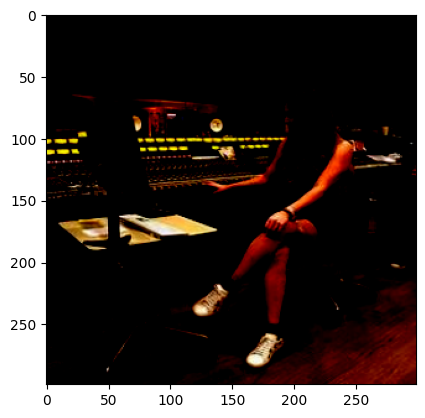

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x.permute(1,2,0))
print(y)

# print(dataset.vocab.itos[1])

for i in y:
    print(dataset.vocab.itos[int(i)],end=" ")

In [ ]:
def save_checkpoint(state, filename = "/content/drive/MyDrive/ML Caption Craft/my_checkpoint.pth.tar"):
    print("saving checkpoint!")
    torch.save(state, filename)
def load_checkpoint(checkpoint, model, optimizer):
    print("loading checkpoint!")
    model.load_state_dict(checkpoint["state_dict"])
    model.load_state_optimizer(checkpoint["optimizer"])
    step = checkpoint["step"]
    return step

In [ ]:
torch.backends.cudnn.benchmark = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
load_model = False
save_model= True
train_CNN = False

In [ ]:
device

device(type='cuda')

In [ ]:
import torch.optim as optim

step = 0
embed_size = 256
hidden_size = 256
num_layers = 5
num_epochs = 5
learning_rate = 0.001
vocab_size = len(dataset.vocab)

model = CNN2RNN(embed_size=embed_size, hidden_size=hidden_size,
                vocab_size=vocab_size, num_layers=num_layers).to(device=device)
model.decoderRNN

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 154MB/s] 


decoderRNN(
  (embedding): Embedding(239611, 256)
  (lstm): LSTM(256, 256, num_layers=5)
  (linear): Linear(in_features=256, out_features=239611, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
loss_criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi["<PAD>"])
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
if load_model:
    step = load_checkpoint(torch.load("/content/drive/MyDrive/ML Caption Craft/my_checkpoint.pth.tar"), model, optimizer)

In [ ]:
model.train()
loss =0
for epoch in tqdm(range(num_epochs)):
    if save_model:
        checkpoint = {
            # "state_dict": model.state_dict(),
            # "optimizer": model.state_dict(),
            # "step": step,

            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
        }
        save_checkpoint(checkpoint)

#     for idx, (imgs, captions) in tqdm(
#         enumerate(loader), total=len(loader), leave=False
#     ):
    for idx, (imgs, captions) in enumerate(tqdm(loader)):
        imgs = imgs.to(device)
        captions = captions.to(device)

        score = model(imgs, captions[:-1])

#         print(score.shape, captions.shape)
#         print(score.reshape(-1, score.shape[2]).shape, captions.reshape(-1).shape)
#         print("why are we reshaping it here?")
        optimizer.zero_grad()
        loss = loss_criterion(score.reshape(-1, score.shape[2]), captions.reshape(-1))


        step += 1

        loss.backward()
        optimizer.step()

    print(f"Loss for epoch {epoch}: {loss}")


  0%|          | 0/5 [00:00<?, ?it/s]

saving checkpoint!


  0%|          | 0/2500 [00:00<?, ?it/s]

torch.Size([2, 3, 299, 299])
torch.Size([2, 256]) torch.Size([145, 2])
torch.Size([2, 256]) torch.Size([145, 2])
torch.Size([2, 3, 299, 299])
torch.Size([2, 256]) torch.Size([26, 2])
torch.Size([2, 256]) torch.Size([26, 2])
torch.Size([2, 3, 299, 299])
torch.Size([2, 256]) torch.Size([116, 2])
torch.Size([2, 256]) torch.Size([116, 2])
torch.Size([2, 3, 299, 299])
torch.Size([2, 256]) torch.Size([22, 2])
torch.Size([2, 256]) torch.Size([22, 2])


KeyboardInterrupt: ignored

['<SOS>', 'i', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


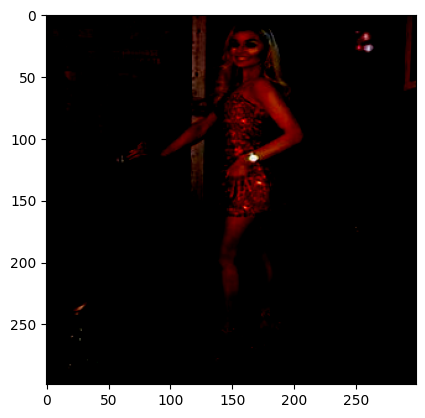

In [ ]:
# image_path = "/content/drive/MyDrive/ML Caption Craft/Likable Images/2006702140945780527.jpg"

model.eval()
plt.imshow(x.permute(1,2,0))
# print(y)
# img =[x]
image_input = x.to(device=device) # check here

ans = model.captionImage(image=image_input.unsqueeze(0), vocabulary=dataset.vocab)
print(ans)

In [ ]:
len(ans)

50

In [ ]:
!nvidia-smi

In [ ]:
likable_data.loc[5001]

In [ ]:
# model = load_checkpoint(torch.load("/content/drive/MyDrive/ML Caption Craft/my_checkpoint.pth.tar"), model, optimizer)

checkpoint = torch.load("/content/drive/MyDrive/ML Caption Craft/my_checkpoint.pth.tar")
model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

<All keys matched successfully>

AttributeError: ignored

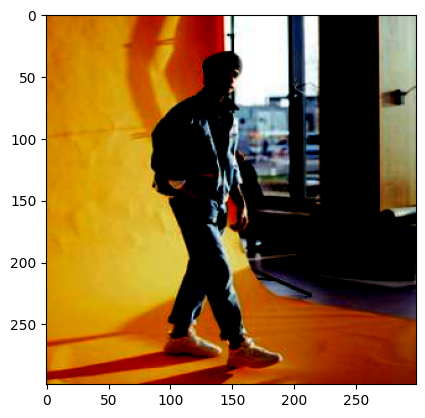

In [ ]:
image_path = "/content/drive/MyDrive/ML Caption Craft/Likable Images/2006702140945780527.jpg"

img = Image.open(image_path).convert("RGB")

img = transform(img)

plt.imshow(img.permute(1,2,0))
img =[img]
image_input = img.to(device=device) # check here

print(model.captionImage(image=image_input, vocabulary=dataset.vocab))